In [105]:
%matplotlib inline
import numpy as np
#import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
#print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join,QTable
from astropy.table import unique as tab_unique
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
#import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

from astropy.table import setdiff

from scipy.stats import ks_2samp
#import ndtest

import sys

from matplotlib.colors import LinearSegmentedColormap


In [106]:
from diagnostic_diagrams_plots import diagnostic_diagram_plot
from diagnostic_diagrams_plots import main_plot_function
from misc import kewley
from utils_plot import textonly, textonly2

In [107]:
def plot_diagnostic_diagram_single(type_plot: str, statistic: str,
                                   prop: str,
                                   data: pd.DataFrame,
                                   ax: plt.Axes,
                                   vmin=None, vmax=None,
                                   histogram=False) -> mpl.image.AxesImage:
    """
    Diagnostic diagrams plotting auxiliary function
    """
    ylabel = 'log_OIII_Hb_cen'
    if type_plot == 'O3N2':
        xlabel = 'log_NII_Ha_cen'
    elif type_plot == 'O3S2':
        xlabel = 'log_SII_Ha_cen'
    elif type_plot == 'O3O1':
        xlabel = 'log_OI_Ha_cen'
    elif type_plot == 'O3O2':
        xlabel = 'log_OII_Hb_cen'
    x_data = data[xlabel]
    y_data = data[ylabel]
    z_data = data[prop]
    mean_prop = np.mean(z_data)
    std_prop = np.std(z_data)
    # print(prop, mean_prop, std_prop)
    if statistic == 'mean':
        if vmin is None:
            if prop == 'Av':
                vmin = 0
            else:
                vmin = mean_prop - 3*std_prop
        if vmax is None:
            if prop == 'Av':
                vmax = 2*mean_prop
            else:
                vmax = mean_prop + 3*std_prop
    elif statistic == 'std':
        if vmin is None:
            vmin = 0
        if vmax is None:
            vmax = 2*std_prop
    plot = diagnostic_diagram_plot(x_data, y_data, z_data, type_plot=type_plot,
                                   vmin=vmin, vmax=vmax, ax=ax,
                                   statistic=statistic)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.tick_params(axis='both', which='both', direction='in', top=True,
                   right=True)
    if histogram:
        axis_ins = ax.inset_axes([0.05, 0.10, 0.35, 0.15])
        counts, bins, _ = axis_ins.hist(z_data, bins=60, density=True,
                                        range=(vmin, vmax), color='k')
        axis_ins.plot([mean_prop, mean_prop], [0, max(counts)], 'r--', lw=1)
        msg = r"${}\pm{}$".format(np.round(mean_prop, 2),
                                  np.round(std_prop, 2))
        if prop == 'f_y':
            y_pos = mean_prop+.05
        else:
            y_pos = mean_prop-1.5*np.abs(mean_prop)
#            y_pos = mean_prop+.15
        axis_ins.text(y_pos, max(counts)*(1.1), msg, {'fontsize': 14})
        axis_ins.spines['top'].set_visible(False)
        axis_ins.spines['right'].set_visible(False)
        axis_ins.spines['left'].set_visible(False)
        axis_ins.set_yticks([])
        #axis_ins.set_xticklabels([])
        axis_ins.patch.set_alpha(0.1)
        #axis_ins.set_xticks(get_ticks_hist(prop))
    return plot


In [108]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
color_cm_r = color_cm_now.reversed()



In [109]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   1.5,\
           'ytick.minor.size'        :   1.5,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   0.5,\
           'ytick.minor.width'       :   0.5,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [110]:
#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=0.78 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc



#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=-10000 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= 0.5*sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc



def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_2Dhist(x_par=None,y_par=None,z_par=None,x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]    
    if (labels_zbins==None):    
        labels_zbins=np.zeros(n_zbins)
    #print(labels_zbins,delta_z)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
#        print(z_bins,z_bin_min,z_bin_max)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
#        print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig('fig/'+figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
    
    
    
def plot_2Dhist_map(x_par=None,y_par=None,z_par=None,\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear',contour=0,\
                   if_fit=0,conts=[0.95,0.65,0.40],med=0):

    fig = plt.figure(figsize=(8,6))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)

#    colormap = plt.cm(color_cm_now)
    #ax.scatter(x_par, y_par, s=size_scatter*3, \
    #           alpha=0.1*alpha,edgecolor='none',color='black',\
    #           rasterized=True,label=label)
    
#    for indx in arange(n_zbins):
    
#    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
#               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    
#    print(mapcolors)
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    X=[]
    Y=[]
    C=[]
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
        new_cmap=truncate_colormap(colormap, minval=indx/n_zbins-0.05, maxval=indx/n_zbins+0.05, n=3)
        if (med==0):
            x_mean=np.mean(x_par[mask_z_par])
            y_mean=np.mean(y_par[mask_z_par])
        else:
            x_mean=np.median(x_par[mask_z_par])
            y_mean=np.median(y_par[mask_z_par])
        X.append(x_mean)
        Y.append(y_mean)
        C.append(indx)
        print(labels_zbins[indx],x_mean,y_mean,y_mean/x_mean,y_mean-x_mean)
        my_contourf(ax,x_par[mask_z_par],y_par[mask_z_par],\
                   x_min,x_max,y_min,y_max,c_color=mapcolors[indx],\
            nbins=25,title=label,linewidths=3,alpha=0.6*alpha,\
                   conts=[0.85,0.01],cmap=new_cmap,colors=1)
#    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    

    
    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
#    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)
    
    if (contour==1):
        my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
                   nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,zorder=100)
#    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    cmap_now = LinearSegmentedColormap.from_list('cmap_now', mapcolors, N=len(mapcolors))
    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
               cmap=cmap_now,alpha=alpha)

#    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
#               cmap=cmap_truncate,alpha=alpha)
   
    if (if_fit==1):
        pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
                                              x_par,\
                                              y_par,\
                                              z_par,\
                                              x_min,x_max,y_min,y_max,z_min,z_max,'',\
                                              '',-2,title='', fit_title='', Delta=(x_max-x_min)/50,\
                                             if_contour=0, if_bin=1, if_scatter=0, max_c=0.95,den_par_min=0.85)
        x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
        y_plot=pa1[0]+pa1[1]*x_plot
        fact=1.0
        l_b=np.round(pa1[0],2)
        l_a=np.round(pa1[1],2)
        r_now=rc[0,1]
        l_r=np.round(r_now,2)
        l_s=np.round(s_dy_par*fact,2)
        label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
        p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black',\
                        color ='black',zorder=10,label=label,alpha=0.85)

        
    ax.set_xlabel(x_label, fontsize=25)
    ax.set_ylabel(y_label, fontsize=25)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
#    ax_histy.set_ylim(y_min,y_max)
#    ax_histx.set_xlim(x_min,x_max)
    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label).set_zorder(10000)#,\
#             framealpha=None)
#.set_zorder(100)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    return fig,ax
#    fig.tight_layout()
#    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

##########

def comp_plot_hist(x_par=None,y_par=None,\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None,\
                  x_min_p=None,x_max_p=None,y_min_p=None,y_max_p=None,fsize=(6,6), x_r=0, y_r=0):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=fsize)
    left, width = 0.17, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)   
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    if (one is None):
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    #sns.kdeplot(par,ax=ax_histx, shade=True, legend=False,\
    #            color="grey")#,gridsize=int(len(rat[mask])/2)
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 2.)
    max_kde_xx=np.max(kde_xx(xx))
    yy=(kde_xx(xx))/np.max(kde_xx(xx))
    ax_histx.fill_between(xx,0*yy,yy,color='grey',alpha=alpha)
    ax_histx.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
    
    par=y_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    xx=(kde_yy(yy))/np.max(kde_yy(yy))
    ax_histy.fill_betweenx(yy,0*xx,xx,color='grey',alpha=alpha)
    ax_histy.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
        
    #ax_histx.spines['right'].set_visible(False)
    #ax_histx.spines['top'].set_visible(False)
    #ax_histx.spines['left'].set_visible(False)
    #ax_histx.get_yaxis().set_visible(False)
    #ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    
#    ax.text(x_min+0.45*(x_max-x_min),y_min+0.05*(y_max-y_min),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)
    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    #ax.set_xticks(ax.get_yticks())
    if (x_min_p==None):
        x_min_p=x_min
        x_max_p=x_max
        y_min_p=y_min
        y_max_p=y_max
    ax.set_xlim([x_min_p,x_max_p])
    ax.set_ylim([y_min_p,y_max_p])
#    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    if (x_r==1):
        ax.set_xlim([x_max_p,x_min_p])
    if (y_r==1):
        ax.set_ylim([y_max_p,y_min_p])


    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    if (equal is None):
        ax.set_xticks(ax.get_yticks())
    
    return fig,ax,mean,std


In [111]:
def find_bins_fix(data, min_points_per_bin, min_bin_width):
    """
    Function to find bins that fulfill two criteria:
    1. Minimum number of points in each bin
    2. Minimum width of the bins
    
    Parameters:
    - data: 1D array of data points
    - min_points_per_bin: Minimum number of points required in each bin
    - min_bin_width: Minimum width required for each bin
    
    Returns:
    - bins: List of bin edges that fulfill the criteria
    """
    # Sort the data
    sorted_data = np.sort(data)
    
    # Initialize bins list with the first bin
    bins = [sorted_data[0]]
    
    # Iterate through the sorted data to find bin edges
    for i in range(1, len(sorted_data)):
        if sorted_data[i] - bins[-1] >= min_bin_width:
            # Check if adding the next point forms a bin with sufficient width
            if i >= min_points_per_bin:
                # Check if there are enough points in the current bin
                bins.append(sorted_data[i])
    
    # Append the last data point to complete the last bin
    bins.append(sorted_data[-1])
    
    return bins


In [112]:
def find_bins(data, min_points_per_bin, min_bin_width):
    """
    Function to find bins that fulfill two criteria:
    1. Minimum number of points in each bin
    2. Minimum width of the bins, with an option to increase the minimum width if the number of points is not reached
    
    Parameters:
    - data: 1D array of data points
    - min_points_per_bin: Minimum number of points required in each bin
    - min_bin_width: Minimum width required for each bin
                      If the number of points in a bin is less than min_points_per_bin, 
                      the function will try to increase the bin width until the number of points meets the requirement
    
    Returns:
    - bins: List of bin edges that fulfill the criteria
    """
    # Sort the data
    sorted_data = np.sort(data)
    
    # Initialize bins list with the first bin
    bins = [sorted_data[0]]
    
    # Iterate through the sorted data to find bin edges
    for i in range(1, len(sorted_data)):
        if sorted_data[i] - bins[-1] >= min_bin_width:
            # Check if adding the next point forms a bin with sufficient width
            if i - len(bins) >= min_points_per_bin:
                # Check if there are enough points in the current bin
                bins.append(sorted_data[i])
            else:
                # Increase the minimum bin width until the number of points requirement is met
                while i - len(bins) < min_points_per_bin:
                    bins[-1] = sorted_data[i]  # Increase the end of the current bin
                    if i - len(bins) >= min_points_per_bin:
                        bins.append(sorted_data[i])  # Add the next point to start a new bin
                        break
    
    # Append the last data point to complete the last bin
    bins.append(sorted_data[-1])
    
    return bins


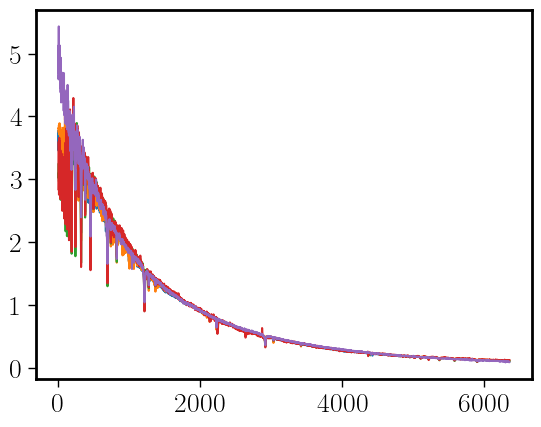

In [113]:
#
# MaStar CoSha template
#
DIR="/disk-a/sanchez/LVM/LVM/templates/"
MaStar_file="stellar-basis-spectra-9795.fits.gz"
#MaStar_file="stellar-basis-spectra-14473.fits.gz";
hdu=fits.open(f'{DIR}/{MaStar_file}')
tab=Table(hdu[1].data)  
hdu[0].data=np.float32(hdu[0].data)

for spec in hdu[0].data[0:5,:]:
    plt.plot(spec)

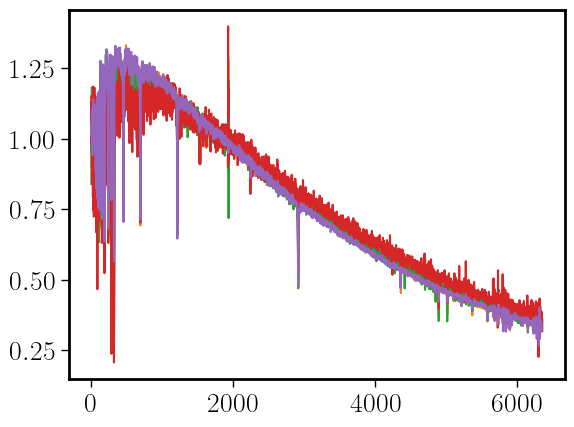

In [114]:
#
# MaStar CoSha template
#
DIR="/disk-a/sanchez/LVM/LVM/MaStar/"#"/disk-a/sanchez/LVM/LVM/templates/"
MaStar_file="mastar-catalogue.fits.gz"
#MaStar_file="stellar-basis-spectra-14473.fits.gz";
hdu=fits.open(f'{DIR}/{MaStar_file}')
hdu[0].header['WAVENORM']=5500.0
tab=Table(hdu[1].data)  
hdu[0].data=np.float32(hdu[0].data)
for spec in hdu[0].data[0:5,:]:
    plt.plot(spec)

In [115]:
tab['TEFF']=np.log10(tab['TEFF'])

In [116]:
tab.columns

<TableColumns names=('ID','RECORD','NEXP','RA','DEC','DIST','EBV','VCORR','SNR','FNORM','USDSS','GSDSS','RSDSS','ISDSS','ZSDSS','RADVEL','RVERR','TEFF','LOGG','MET','ALPHAM')>

In [117]:
hdu.info()

Filename: /disk-a/sanchez/LVM/LVM/MaStar//mastar-catalogue.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPECTRA       1 PrimaryHDU      13   (6351, 22773)   float32   
  1  CATALOGUE     1 BinTableHDU     67   22773R x 21C   ['22A', 'E', 'E', '12A', '13A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   


In [282]:
#
# Some statistics
#
rss_sec=hdu[0].data[:,330:440]
mean_sec=np.median(rss_sec,axis=1)
std_sec=np.std(rss_sec,axis=1)
SN_sec=mean_sec/std_sec
SN_lim = 5
mask_EL = hdu[0].data[:,320] < 0.5*(hdu[0].data[:,310]+hdu[0].data[:,330])
mask_EL = mask_EL & (hdu[0].data[:,2913] < 1.1*0.5*(hdu[0].data[:,2890]+hdu[0].data[:,2933]))
#mask_EL = mask_EL & (hdu[0].data[:,2913] < 0.5*(hdu[0].data[:,2908]+hdu[0].data[:,2919]))
mask_SN = (SN_sec>SN_lim) & mask_EL & (tab['SNR']>SN_lim)


mask_flux = tab['FNORM']>5*1e-16   


mask_SEL = mask_SN & mask_flux

print(len(SN_sec[mask_SN & mask_flux]))

print(tab)


19303
    ID     RECORD NEXP      RA           DEC         DIST        EBV         VCORR     ... ZSDSS   RADVEL     RVERR       TEFF      LOGG        MET         ALPHAM  
--------- ------- ---- ------------ ------------- ---------- ----------- ------------- ... ----- ---------- ---------- --------- --------- ------------- -----------
     13-0 27373.0  6.0 15h24m04.27s +41d54m50.04s   2.118211 0.013415194  9.843331e-06 ...  14.9 -60.050854  0.8497747  3.792502 3.9201782    -1.7934282   0.2766171
     13-1 27376.0  6.0 15h23m54.70s +41d30m57.16s  2.2692332 0.013914995 4.5154848e-06 ... 15.47  -65.59255  1.0004026 3.7989683 3.6374876    -1.3652368  0.48837265
    13-11 27405.0  6.0 15h29m17.82s +43d37m48.81s  2.7908385 0.022138294 2.3680163e-06 ... 16.46 -185.34999   0.853247 3.7924886  4.156902     -1.108777  0.28072965
     13-2 27379.0  6.0 15h22m34.17s +42d26m50.59s  1.9418392     0.01775   4.50987e-07 ... 17.46 -16.344204  1.1085759  3.784305  3.745482    -1.1370758  0.28996968
    

In [283]:
#tab=tab[mask_SN & mask_flux]
#mask_flux = tab['FNORM']>10*1e-16   
#print(len(tab))

In [284]:
#stellar-basis-spectra-100.fits.gz
#MaStar_file_few="stellar-basis-spectra-100.fits.gz"
DIR_few='/disk-a/sanchez/LVM/LVM/templates/_basis-binned_mastar/'
MaStar_file_few="stellar-basis-spectra-binned-110-mastar.fits.gz"
hdu_few=fits.open(f'{DIR_few}/{MaStar_file_few}')
tab_few=Table(hdu_few[1].data)  


In [285]:
#tab_few[1:10]
print(len(tab_few))
print(len(tab))

110
22773


(array([0.0005    , 0.00116667, 0.00166667, 0.00166667, 0.00066667,
        0.00166667, 0.001     , 0.001     , 0.        , 0.00066667]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

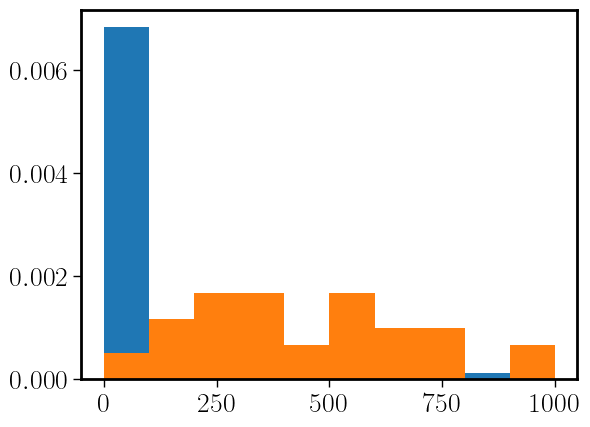

In [286]:
val=tab['FNORM']*1e16
binwidth=100
bins=bins=range(0,1000+binwidth, binwidth)
plt.hist(tab['FNORM']*1e16,bins,density=True)
plt.hist(tab_few['FNORM']*1e16,bins,density=True)



(array([  277.,  2246.,  1817.,  2077.,  2873., 11032.,  1164.,   509.,
          549.,   229.]),
 array([3.47114015, 3.52957153, 3.58800292, 3.64643431, 3.70486569,
        3.76329708, 3.82172871, 3.88016009, 3.93859148, 3.99702287,
        4.05545425]),
 <BarContainer object of 10 artists>)

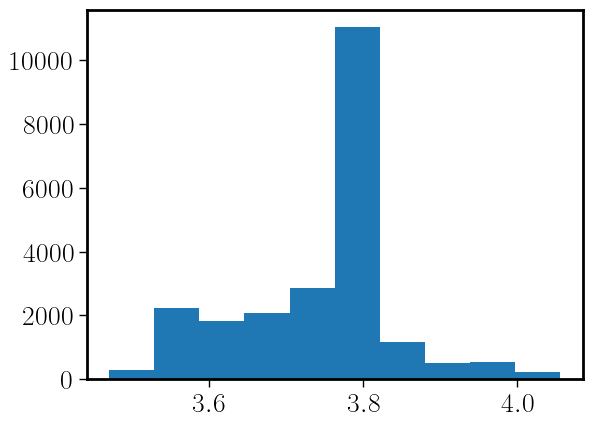

In [287]:
plt.hist(tab['TEFF'])

(array([   61.,   727.,   837.,   748.,   996.,  1515.,  5591., 10318.,
         1944.,    36.]),
 array([-0.25544223,  0.3432864 ,  0.94201499,  1.54074359,  2.13947225,
         2.7382009 ,  3.33692956,  3.93565798,  4.53438663,  5.13311529,
         5.73184395]),
 <BarContainer object of 10 artists>)

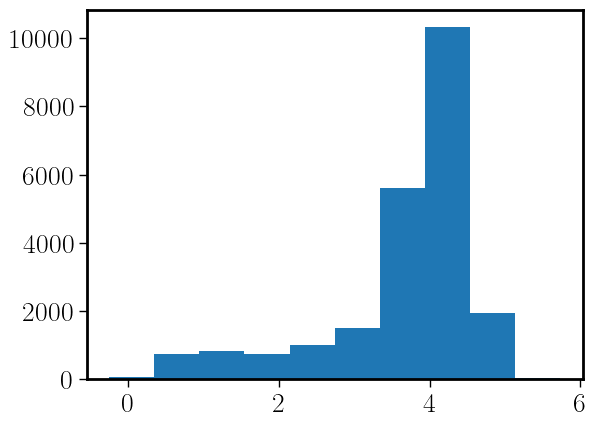

In [288]:
plt.hist(tab['LOGG'])

(array([0.09187684, 0.22969196, 0.09187684, 0.29859954, 0.2296921 ,
        0.09187681, 0.43641478, 0.22969204, 0.66610693, 0.16078442]),
 array([-3.56394005e+00, -3.16815329e+00, -2.77236629e+00, -2.37657952e+00,
        -1.98079252e+00, -1.58500576e+00, -1.18921888e+00, -7.93431938e-01,
        -3.97645086e-01, -1.85822253e-03,  3.93928647e-01]),
 <BarContainer object of 10 artists>)

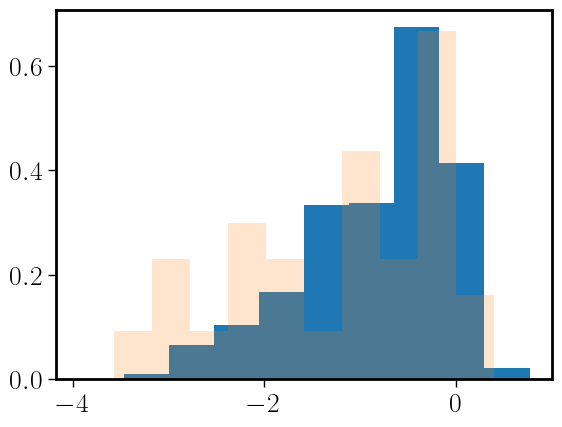

In [289]:
plt.hist(tab['MET'],density=True)
plt.hist(tab_few['MET'],density=True,alpha=0.2)

In [290]:
print(len(tab_few[tab_few['MET']>-0.5]))
print(len(tab[tab['MET']>-0.5]))

36
10353


(array([0.44744925, 2.95316503, 1.16336813, 1.70030714, 1.87928684,
        0.26846955, 0.1789797 , 0.71591879, 0.3579594 , 0.1789797 ]),
 array([-0.11757123, -0.0159853 ,  0.08560062,  0.18718654,  0.28877246,
         0.39035839,  0.49194431,  0.59353024,  0.69511616,  0.79670209,
         0.89828801]),
 <BarContainer object of 10 artists>)

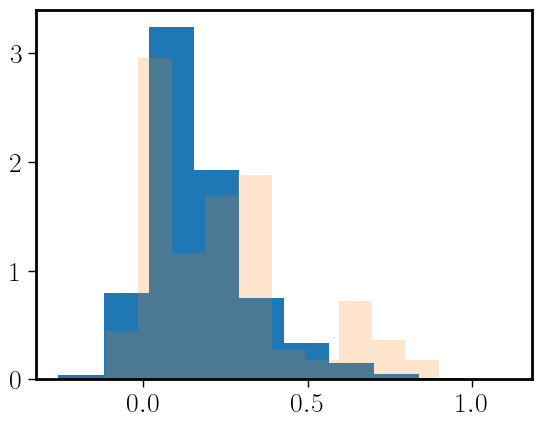

In [291]:
plt.hist(tab['ALPHAM'],density=True)
plt.hist(tab_few['ALPHAM'],density=True,alpha=0.2)

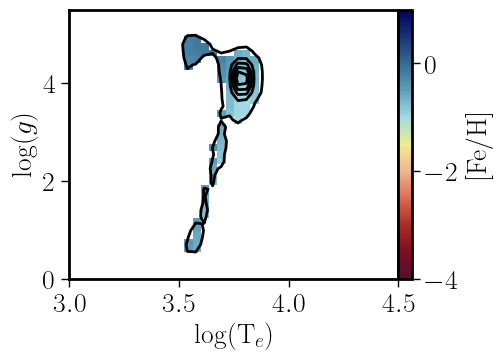

In [292]:
fig, ax = plt.subplots(figsize=(5,3.5))
params={}
params['xlim']=[3,4.5]
params['ylim']=[0,5.5]
params['norm_value']=None
params['vmin']=-4
params['vmax']=1
params['cmap']=color_cm_r
params['levels']=[0.05, 0.25, 0.45, 0.65, 0.85]
params['dcurves']=False
x = tab['TEFF']
y = tab['LOGG']
z = tab['MET']
mask_now = (x>0) & (y>-6) & (z>-100)
plot=main_plot_function(x[mask_now],y[mask_now],\
                   z[mask_now],params,ax,40,statistic='mean')
ax.set_xlabel(r'log(T$_{e}$)')
ax.set_ylabel(r'log($g$)')
colorbar = fig.colorbar(plot, ax=ax, pad=0)
colorbar.set_label(r'[Fe/H]')

19303
22773


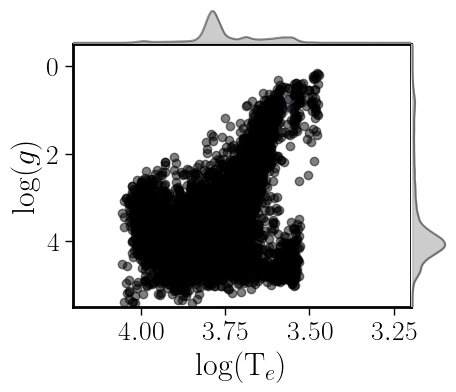

In [293]:
mask_SN =  (tab['SNR']>SN_lim)
mask = (tab['FNORM']>0) & (mask_SN)
mask_few = mask_SEL

fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.99999,0.65,0.25,0.0],fsize=(4.5,3.5))
ax.scatter(tab['TEFF'][mask_few],tab['LOGG'][mask_few],color='k',edgecolor=None,alpha=0.5)
print(len(tab['TEFF'][mask_few]))
print(len(tab[mask]))

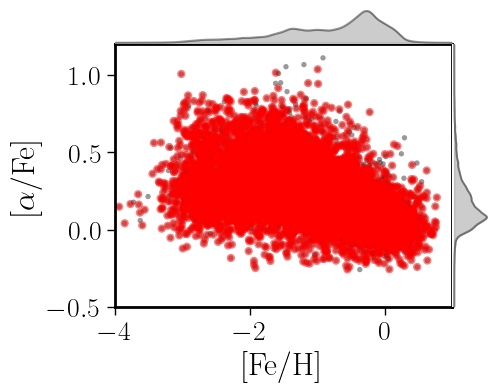

In [294]:
mask = (tab['FNORM']>0) & (mask_SN)
mask_few = mask_SEL


fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=1,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
ax.scatter(tab['MET'][mask_few],tab['ALPHAM'][mask_few],color='r',edgecolor='None',alpha=0.5)



1772


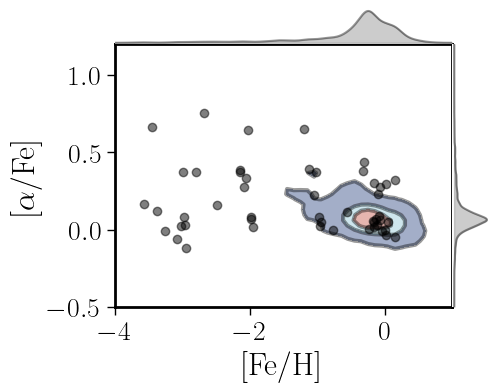

In [295]:
mask = (tab['FNORM']>1000*1e-16) & mask_SN
mask_few = tab_few['FNORM']>1000*1e-16
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor=None,alpha=0.5)
print(len(tab[mask]))

1772


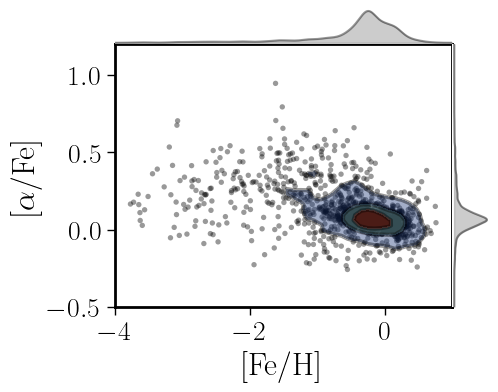

In [296]:
mask = (tab['FNORM']>1000*1e-16) #& (mask_SN)
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=1,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

6192


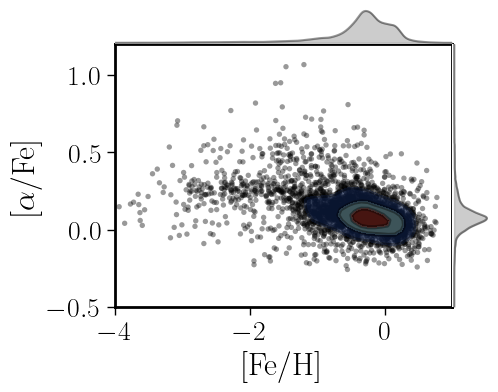

In [297]:
mask = (tab['FNORM']>200*1e-16) #& mask_SN
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=1,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

2355


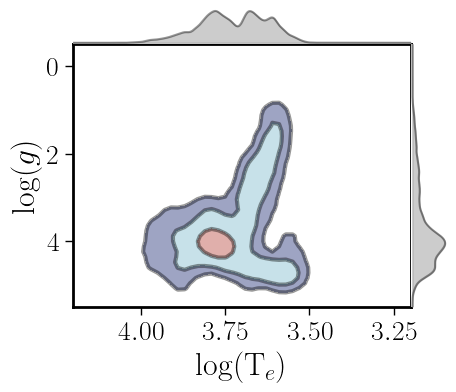

In [298]:
mask = tab['MET']>0
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

2075


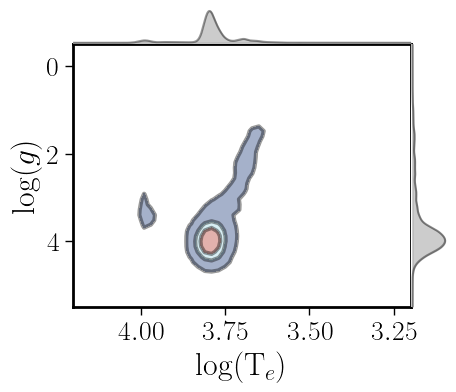

In [299]:
mask = tab['MET']<-2
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

1772


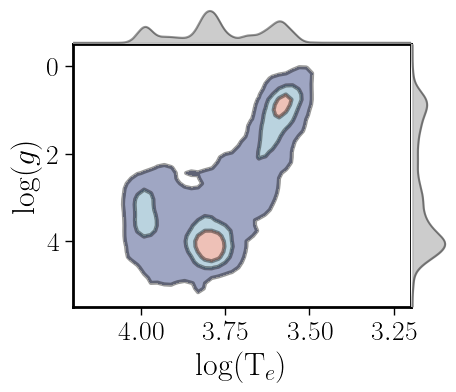

In [300]:
mask = tab['FNORM']>1000*1e-16
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

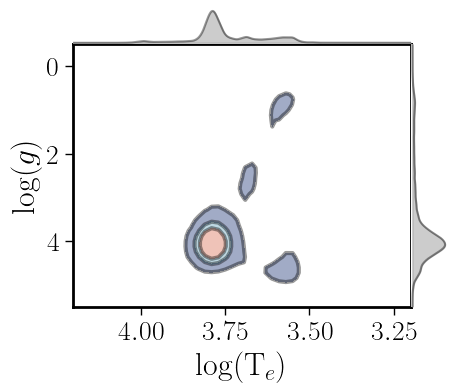

In [301]:
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'],y_par=tab['LOGG'],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))


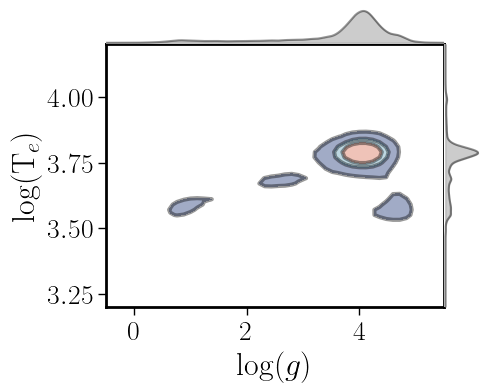

In [302]:
fig,ax,mean,std=comp_plot_hist(x_par=tab['LOGG'],y_par=tab['TEFF'],\
          x_label=r'log($g$)', y_label=r'log(T$_e$)', 
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-0.5,x_max=5.5, y_min=3.2, y_max=4.2,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))


109


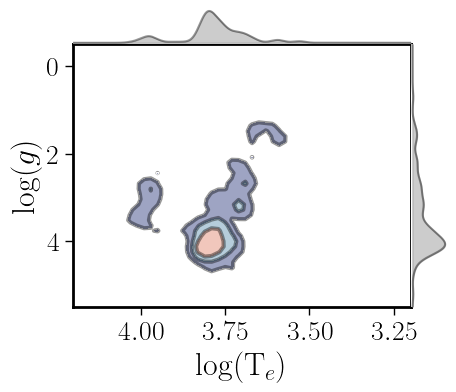

In [303]:
mask = tab['FNORM']>0

mask = mask & (tab['MET']<-3)

fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

In [304]:
#mask_flux = tab['FNORM']>500*1e-16   
print(len(tab['MET']))
mets=find_bins_fix(tab['MET'], 200, 0.15)
print(mets)
print(len(mets))
print(mets)

22773
[-3.9379308, -2.908242, -2.7573805, -2.6068203, -2.4558194, -2.3051195, -2.1545062, -2.004326, -1.8542523, -1.7040957, -1.5538929, -1.4038616, -1.2538055, -1.1037974, -0.95369095, -0.8034951, -0.6533724, -0.503303, -0.35327998, -0.20296234, -0.05278465, 0.09750549, 0.24756677, 0.40042531, 0.55542624, 0.712675, 0.76929116]
27
[-3.9379308, -2.908242, -2.7573805, -2.6068203, -2.4558194, -2.3051195, -2.1545062, -2.004326, -1.8542523, -1.7040957, -1.5538929, -1.4038616, -1.2538055, -1.1037974, -0.95369095, -0.8034951, -0.6533724, -0.503303, -0.35327998, -0.20296234, -0.05278465, 0.09750549, 0.24756677, 0.40042531, 0.55542624, 0.712675, 0.76929116]


In [305]:
#-1000 -1.1026284 300
#-1.1026284 -0.95080054 72
#-0.95080054 -0.8003126 83
#-0.8003126 -0.6501008 99
#-0.6501008 -0.5000529 200
#-0.5000529 -0.3493666 395
#-0.3493666 -0.19885609 633
#-0.19885609 -0.047848035 440
#-0.047848035 0.10279064 371
#0.10279064 0.25283742 291
#0.25283742 0.4044241 96
#0.4044241 0.55542624 35
#0.55542624 1000 22
#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))

# Picking metallicities
#mets=np.array((-1000,-1.7,-0.80,-0.45,-0.27,-0.05,0.15,0.3,1000))
mets=find_bins_fix(tab['MET'], 200, 0.25)
print(len(mets))


17


-3.9379308 -2.908242 199
-2.908242 -2.6579747 361
-2.6579747 -2.4069624 482
-2.4069624 -2.1561894 565
-2.1561894 -1.9056524 772
-1.9056524 -1.6555262 941
-1.6555262 -1.4053739 1641
-1.4053739 -1.1551517 1997
-1.1551517 -0.9051426 1897
-0.9051426 -0.65509367 1926
-0.65509367 -0.40503213 2981
-0.40503213 -0.15499328 4618
-0.15499328 0.09507109 2975
0.09507109 0.3456561 1234
0.3456561 0.5964106 146
0.5964106 0.76929116 21
4 12


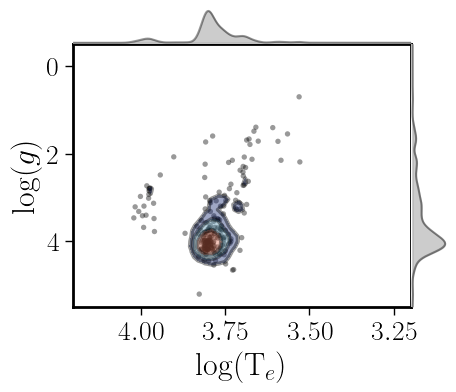

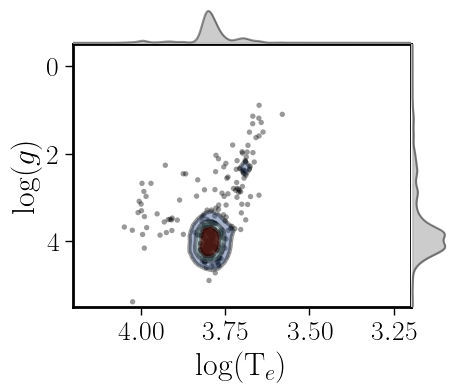

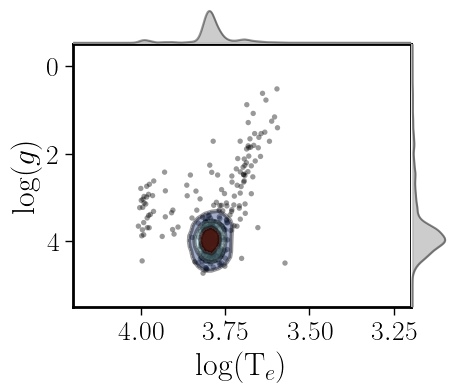

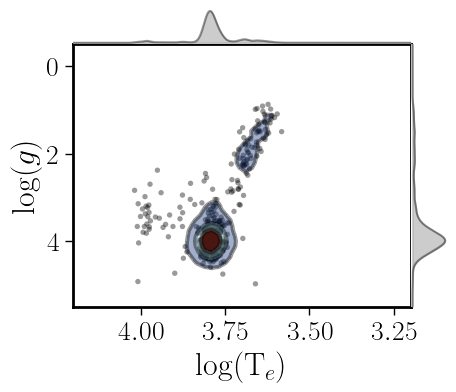

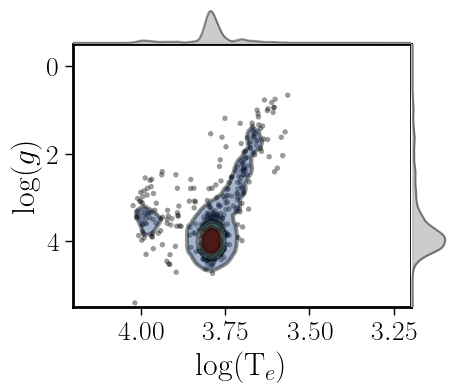

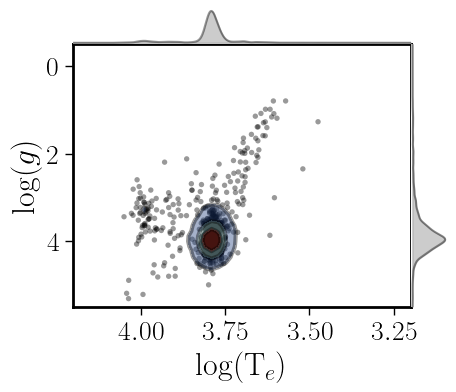

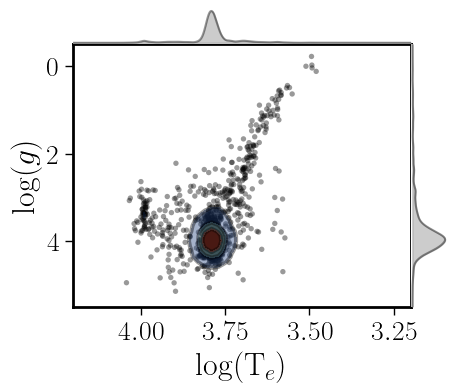

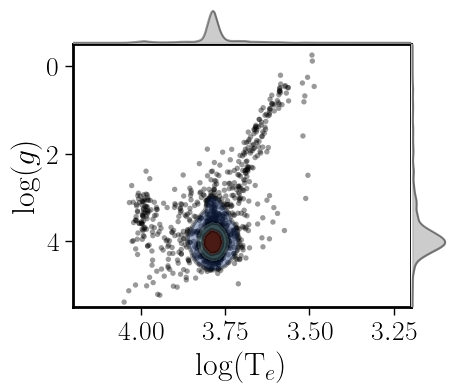

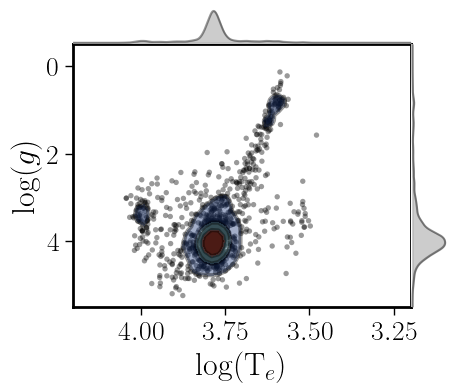

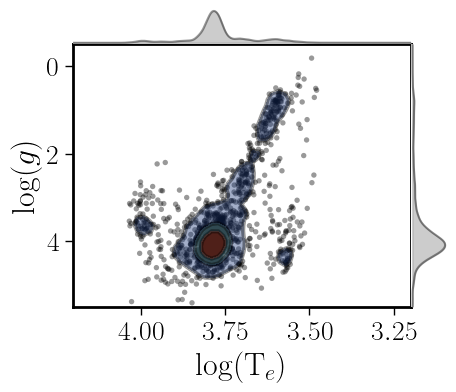

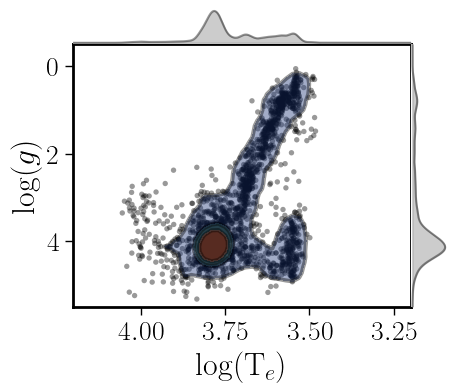

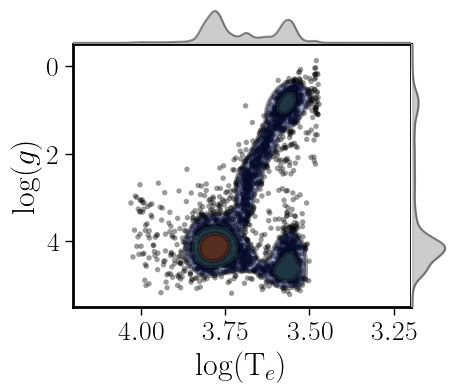

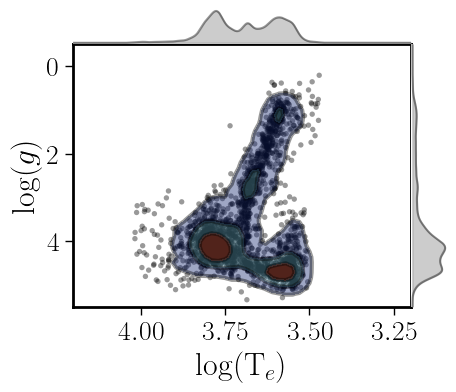

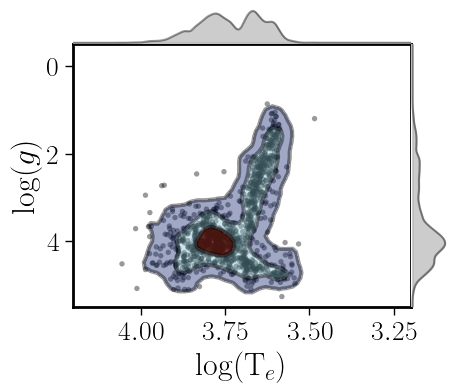

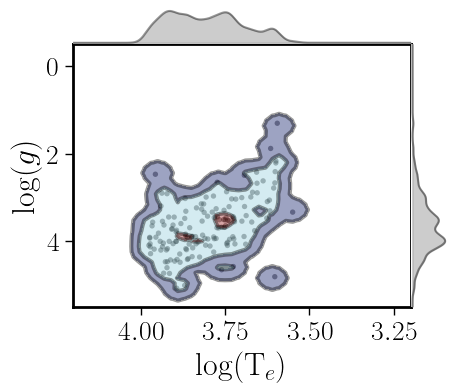

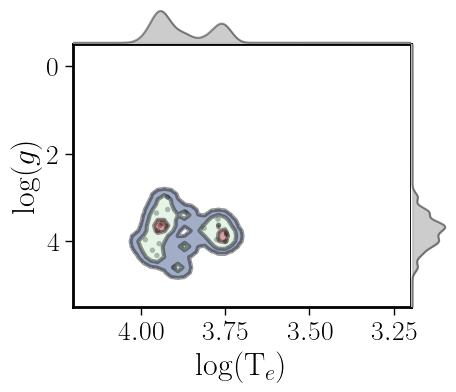

In [306]:
#mask_flux = tab['FNORM']>500*1e-16   

for I in np.arange(len(mets)-1):
    met_min=mets[I]
    met_max=mets[I+1]
    mask = (tab['MET']>met_min) & (tab['MET']<met_max)
    print(met_min,met_max,len(tab['TEFF'][mask]))
    fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
                                   x_label=r'log(T$_e$)', y_label=r'log($g$)',
                                   c_main='black',alpha=0.4,scatter=1,\
                                   x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                                   x_r=1,y_r=1,
                                   equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
   
    
lTes=np.arange(3.2,4.2,0.25)
lgs=np.arange(-0.5,5.5,0.5)
print(len(lTes),len(lgs))


In [336]:
#lTes=np.arange(3.2,4.2,0.1)
#lgs=np.arange(-0.5,5.5,0.5)
#print(len(lTes),len(lgs))

#
# ~500 binned stars!
#

#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))

#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))



alphas=find_bins_fix(tab['ALPHAM'], 200, 0.15)
alphas[0]=-1000
alphas[-1]=1000
print(len(alphas),':',alphas)

mets=find_bins_fix(tab['MET'], 200, 0.2)
mets[0]=-1000
mets[-1]=1000
print(len(mets),':',mets)


lTes=find_bins_fix(tab['TEFF'][mask_flux], 200, 0.03)
lTes[0]=-1000
lTes[-1]=1000
print(len(lTes),':',lTes)

lgs=find_bins_fix(tab['LOGG'][mask_flux], 200, 0.3)
lgs[0]=-1000
lgs[-1]=1000
print(len(lgs),':',lgs)



10 : [-1000, -0.09458996, 0.055410087, 0.20542267, 0.35546947, 0.5055556, 0.6556592, 0.80568045, 1.0083381, 1000]
21 : [-1000, -2.908242, -2.7080722, -2.5079958, -2.3072789, -2.106856, -1.9068038, -1.706726, -1.506681, -1.3062029, -1.10619, -0.9061399, -0.70613676, -0.50576144, -0.3057229, -0.10566613, 0.09435635, 0.29560062, 0.49569395, 0.712675, 1000]
20 : [-1000, 3.527399, 3.5574243, 3.5874367, 3.617515, 3.6475255, 3.6775353, 3.7075858, 3.7375896, 3.767608, 3.7976081, 3.8276265, 3.8577123, 3.8877363, 3.917779, 3.9478695, 3.9779181, 4.008026, 4.0382495, 1000]
20 : [-1000, 0.583342, 0.88336986, 1.1835903, 1.4849325, 1.7857478, 2.0859892, 2.3861997, 2.687078, 2.987787, 3.2881207, 3.5881755, 3.8882053, 4.1882176, 4.488226, 4.7889686, 5.091378, 5.4068217, 5.731844, 1000]


In [337]:
#params={}
#tab_mean=Table(names=tab.columns)
#tab_mean.add_column(name='N_ST')
#N_ST=[]
keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM']#,'e_TEFF','e_LOGG','e_MET','e_ALPHAM','e_FNORM']
e_keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM','e_TEFF','e_LOGG','e_MET','e_ALPHAM']


min_N_ST = 2
params_mean = []
#for i in keyList:
#    params[i] = None

I=0
for Ialphas in np.arange(len(alphas)-1):
    alpha_min=alphas[Ialphas]
    alpha_max=alphas[Ialphas+1]
    alpha_min=alpha_min#-0.001*np.abs(alpha_min)
    alpha_max=alpha_max#+0.001*np.abs(alpha_max)
    for Imets in np.arange(len(mets)-1):
        met_min=mets[Imets]
        met_max=mets[Imets+1]
        met_min=met_min#-0.001*np.abs(met_min)
        met_max=met_max#+0.001*np.abs(met_max)
        for IlTes in np.arange(len(lTes)-1):
            lTes_min=lTes[IlTes]
            lTes_max=lTes[IlTes+1]
            lTes_min=lTes_min#-0.001*np.abs(lTes_min)
            lTes_max=lTes_max#+0.001*np.abs(lTes_max)
            for Ilgs in np.arange(len(lgs)-1):
                lgs_min=lgs[Ilgs]
                lgs_max=lgs[Ilgs+1]
                lgs_min=lgs_min#-0.001*np.abs(lgs_min)
                lgs_max=lgs_max#+0.001*np.abs(lgs_max)
                mask = mask_SEL #mask_flux & mask_SN            
                mask = mask & (tab['ALPHAM']>alpha_min) & (tab['ALPHAM']<=alpha_max)
                mask = mask & (tab['MET']>met_min) & (tab['MET']<=met_max)
                mask = mask & (tab['TEFF']>lTes_min) & (tab['TEFF']<=lTes_max)
                mask = mask & (tab['LOGG']>lgs_min) & (tab['LOGG']<=lgs_max)
                tab_sel=tab[mask]
                n_sel=len(tab_sel)
                #print('n_sel in bin:',len(tab_sel))
                params = {}
                if (n_sel>min_N_ST):
                    print('.',end='')
                    params['N_ST']=n_sel
                    for cols in tab_sel.columns:
                        #                    print(cols)
                        try:
                            params[cols]=np.mean(tab_sel[cols])
                        except:
                            params[cols]=tab_sel[cols][0]
                        try:
                            params['e_'+cols]=np.std(tab_sel[cols])
                        except:
                            non_std=True                
                    params_mean.append(params)


                    #
                    # Average spectra!
                    #
                    spectra=hdu[0].data[mask]                
                    spec=np.mean(spectra,axis=0)
                    e_spec=np.std(spectra,axis=0)
                    if (I==0):
                        rss=spec
                    else:
                        rss= np.vstack((rss, spec))
                        #print(I,rss.shape)
                    I=I+1

#                print(params_mean)

tab_mean=Table()
for key in e_keyList:
    vals=[]
    for i in np.arange(len(params_mean)):
        #print(i,params_mean[i][key])
        vals.append(params_mean[i][key])
    #print(key,vals)
    vals=np.array(vals)
    if (key.find('e_')>-1):
        mask_vals = (vals==0)
        vals_0=vals[vals==0.0]
        vals[vals==0.0] = np.mean(vals[vals!=0.0])
    tab_mean.add_column(vals,name=key)


    
tab_mean

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

N_ST,TEFF,LOGG,MET,ALPHAM,FNORM,e_TEFF,e_LOGG,e_MET,e_ALPHAM
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32
3,3.933316,4.331812,-0.95109534,-0.14910574,2.774137e-13,0.007861944,0.0701415,0.052159414,0.039048508
3,3.9932098,3.7210112,-0.3905691,-0.15078576,3.666225e-13,0.010280624,0.061887857,0.026571764,0.03762745
3,3.8498373,4.033195,-0.20987256,-0.1285125,7.4413986e-14,0.007958871,0.07636907,0.07124082,0.035553683
4,3.847179,4.0028214,-0.038304176,-0.12593675,1.1025077e-13,0.0067029507,0.04037372,0.05706607,0.016368402
3,3.893481,4.537206,0.20135541,-0.16826282,1.6679243e-14,0.0015329827,0.01214265,0.06252152,0.054127824
...,...,...,...,...,...,...,...,...,...
3,3.784913,3.7587297,-1.3269635,0.70536494,1.5434606e-15,0.006660705,0.088355735,0.011404992,0.05663563
5,3.7862701,4.3530593,-1.407185,0.7055188,3.292764e-15,0.0066137523,0.110104814,0.052379113,0.03961004
4,3.8050685,4.0099897,-1.3971639,0.71328694,1.376699e-15,0.00065072614,0.062542886,0.041127972,0.035417944


In [338]:
tab_mean[tab_mean['N_ST']>2]

N_ST,TEFF,LOGG,MET,ALPHAM,FNORM,e_TEFF,e_LOGG,e_MET,e_ALPHAM
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32
3,3.933316,4.331812,-0.95109534,-0.14910574,2.774137e-13,0.007861944,0.0701415,0.052159414,0.039048508
3,3.9932098,3.7210112,-0.3905691,-0.15078576,3.666225e-13,0.010280624,0.061887857,0.026571764,0.03762745
3,3.8498373,4.033195,-0.20987256,-0.1285125,7.4413986e-14,0.007958871,0.07636907,0.07124082,0.035553683
4,3.847179,4.0028214,-0.038304176,-0.12593675,1.1025077e-13,0.0067029507,0.04037372,0.05706607,0.016368402
3,3.893481,4.537206,0.20135541,-0.16826282,1.6679243e-14,0.0015329827,0.01214265,0.06252152,0.054127824
...,...,...,...,...,...,...,...,...,...
3,3.784913,3.7587297,-1.3269635,0.70536494,1.5434606e-15,0.006660705,0.088355735,0.011404992,0.05663563
5,3.7862701,4.3530593,-1.407185,0.7055188,3.292764e-15,0.0066137523,0.110104814,0.052379113,0.03961004
4,3.8050685,4.0099897,-1.3971639,0.71328694,1.376699e-15,0.00065072614,0.062542886,0.041127972,0.035417944


In [339]:
print(rss.shape)
print(hdu[0].data.shape)
print(len(tab_mean))
hdu.info()

(1235, 6351)
(22773, 6351)
1235
Filename: /disk-a/sanchez/LVM/LVM/MaStar//mastar-catalogue.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPECTRA       1 PrimaryHDU      13   (6351, 22773)   float32   
  1  CATALOGUE     1 BinTableHDU     67   22773R x 21C   ['22A', 'E', 'E', '12A', '13A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   


In [340]:
n_st=len(tab_mean)
out_file_rss=f'mstar-stlib-n{n_st}-SN{SN_lim}.fits.gz'
hdu_rss = fits.PrimaryHDU(rss,header=hdu[0].header)
hdu_tab = fits.BinTableHDU(tab_mean,name='PARAMETERS')
hdu_list =fits.HDUList([hdu_rss,hdu_tab])
hdu_list.writeto(out_file_rss,overwrite=True)
#hdu[0].data=rss
#hdu[1]=table_to_hdu(tab_few)

1235
1235


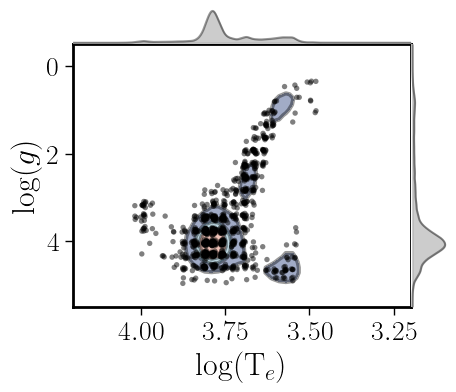

In [341]:
tab_few=tab_mean
mask = tab['FNORM']>0
mask_few = tab_few['FNORM']>0

fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],
#           c=tab_few['MET'][mask_few],edgecolor='None',s=15,alpha=0.5)
ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],color='k',
           edgecolor='None',s=15,alpha=0.5)
print(len(tab_few['TEFF'][mask_few]))
print(len(tab_mean[mask_few]))
plt.show()

1235


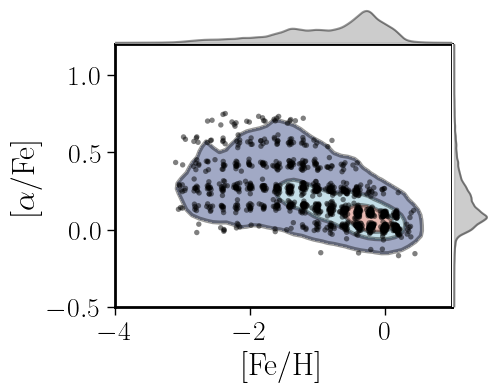

In [342]:
mask = tab['FNORM']>0
mask_few = tab_few['FNORM']>0
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.99,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],
#           c=tab_few['TEFF'][mask_few],edgecolor='None',s=15,alpha=0.5)
ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],
           color='k',edgecolor='None',s=15,alpha=0.5)

#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='r',s=15,edgecolor='None',alpha=0.5)
print(len(tab_mean[mask_few]))


In [46]:
#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))

lTes=find_bins_fix(tab['TEFF'][mask_flux], 200, 0.01)
lTes[0]=-1000
lTes[-1]=1000
print(len(lTes),':',lTes)

lgs=find_bins_fix(tab['LOGG'][mask_flux], 200, 0.5)
lgs[0]=-1000
lgs[-1]=1000
print(len(lgs),':',lgs)



55 : [-1000, 3.529906, 3.539966, 3.5499954, 3.5600054, 3.5700226, 3.5800502, 3.5900958, 3.6001143, 3.610128, 3.6201348, 3.630145, 3.6401606, 3.6501634, 3.6601827, 3.6702433, 3.6802504, 3.6902862, 3.7003033, 3.7103224, 3.7203522, 3.730358, 3.740443, 3.7504644, 3.7604764, 3.770482, 3.780484, 3.7904878, 3.800503, 3.810506, 3.8205106, 3.8305283, 3.8408468, 3.8509178, 3.860929, 3.8711712, 3.8813355, 3.8913822, 3.901402, 3.9114456, 3.9215026, 3.9315612, 3.9417198, 3.951763, 3.9617894, 3.971962, 3.9820914, 3.9921827, 4.002387, 4.012451, 4.0225043, 4.0326905, 4.042983, 4.054554, 1000]
13 : [-1000, 0.583342, 1.0833889, 1.5834763, 2.083915, 2.584791, 3.0849676, 3.58498, 4.085119, 4.5851903, 5.0861235, 5.6042585, 1000]


In [47]:
print(SN_lim)

20


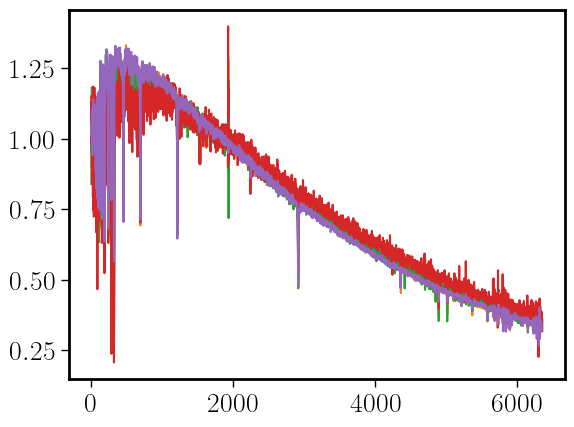

In [48]:
for spec in hdu[0].data[0:5,:]:
    plt.plot(spec)

In [49]:
#
# More restricted!
#
mets=np.array((-1000,-1.9,-0.8,-0.25,0.25,1000))

lTes=find_bins_fix(tab['TEFF'][mask_flux], 100, 0.1)
lTes[0]=-1000
lTes[-1]=1000
print(len(lTes),':',lTes)

lgs=find_bins_fix(tab['LOGG'][mask_flux], 300, 1.8)
lgs[0]=-1000
lgs[-1]=1000
print(len(lgs),':',lgs)


7 : [-1000, 3.5711613, 3.6711657, 3.7711797, 3.871199, 3.9713056, 1000]
5 : [-1000, 1.545473, 3.3459532, 5.147062, 1000]


In [50]:
#params={}
#tab_mean=Table(names=tab.columns)
#tab_mean.add_column(name='N_ST')
#N_ST=[]
keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM']#,'e_TEFF','e_LOGG','e_MET','e_ALPHAM','e_FNORM']
e_keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM','e_TEFF','e_LOGG','e_MET','e_ALPHAM']

params_mean = []
#for i in keyList:
#    params[i] = None

I=0
for Imets in np.arange(len(mets)-1):
    met_min=mets[Imets]
    met_max=mets[Imets+1]
    met_min=met_min-0.001*np.abs(met_min)
    met_max=met_max+0.001*np.abs(met_max)
    for IlTes in np.arange(len(lTes)-1):
        lTes_min=lTes[IlTes]
        lTes_max=lTes[IlTes+1]
        lTes_min=lTes_min-0.001*np.abs(lTes_min)
        lTes_max=lTes_max+0.001*np.abs(lTes_max)
        for Ilgs in np.arange(len(lgs)-1):
            lgs_min=lgs[Ilgs]
            lgs_max=lgs[Ilgs+1]
            lgs_min=lgs_min-0.001*np.abs(lgs_min)
            lgs_max=lgs_max+0.001*np.abs(lgs_max)
            mask = mask_flux & mask_SN            
            mask = mask & (tab['MET']>met_min) & (tab['MET']<=met_max)
            mask = mask & (tab['TEFF']>lTes_min) & (tab['TEFF']<=lTes_max)
            mask = mask & (tab['LOGG']>lgs_min) & (tab['LOGG']<=lgs_max)
            tab_sel=tab[mask]
            n_sel=len(tab_sel)
#            print('n_sel in bin:',len(tab_sel))
            params = {}
            if (n_sel>0):
                params['N_ST']=n_sel
                for cols in tab_sel.columns:
#                    print(cols)
                    try:
                        params[cols]=np.mean(tab_sel[cols])
                    except:
                        params[cols]=tab_sel[cols][0]
                    try:
                        params['e_'+cols]=np.std(tab_sel[cols])
                    except:
                        non_std=True                
                params_mean.append(params)


                #
                # Average spectra!
                #
                spectra=hdu[0].data[mask]                
                spec=np.mean(spectra,axis=0)
                e_spec=np.std(spectra,axis=0)
                if (I==0):
                    rss=spec
                else:
                    rss= np.vstack((rss, spec))
                    #print(I,rss.shape)
                I=I+1

#                print(params_mean)

tab_mean=Table()
for key in e_keyList:
    vals=[]
    for i in np.arange(len(params_mean)):
        #print(i,params_mean[i][key])
        vals.append(params_mean[i][key])
    #print(key,vals)
    vals=np.array(vals)
    if (key.find('e_')>-1):
        mask_vals = (vals==0)
        vals_0=vals[vals==0.0]
        vals[vals==0.0] = np.mean(vals[vals!=0.0])
    tab_mean.add_column(vals,name=key)


    
tab_mean

N_ST,TEFF,LOGG,MET,ALPHAM,FNORM,e_TEFF,e_LOGG,e_MET,e_ALPHAM
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32
5,3.5413659,1.1355726,-2.5192208,0.3731541,2.251623e-14,0.036362093,0.38397846,0.7713116,0.30310205
2,3.5467613,1.867053,-3.0497117,0.36143106,1.1582848e-14,0.018262625,0.32025337,0.12206483,0.16752212
1,3.572508,4.4981546,-2.448323,0.15103252,1.10557925e-14,0.023170898,0.30631414,0.19709349,0.13120885
63,3.6352923,1.2100358,-2.345387,0.23772165,2.3762229e-14,0.024719587,0.2584376,0.28861746,0.07724721
51,3.648058,1.9148468,-2.4119897,0.2341462,4.4063525e-14,0.025020882,0.3135926,0.43315837,0.06498509
...,...,...,...,...,...,...,...,...,...
15,3.81591,3.1112325,0.4511973,0.08974306,1.0765378e-13,0.032092128,0.25114498,0.111302406,0.1096895
95,3.8239698,3.9631119,0.3643961,0.022072148,1.9328766e-13,0.03390201,0.35450375,0.11879269,0.07137
7,3.923427,2.9665463,0.52377546,0.010483993,1.105384e-12,0.02571145,0.24083667,0.12068049,0.13808726


#params={}
#tab_mean=Table(names=tab.columns)
#tab_mean.add_column(name='N_ST')
#N_ST=[]
keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM']#,'e_TEFF','e_LOGG','e_MET','e_ALPHAM','e_FNORM']
params_mean = []
#for i in keyList:
#    params[i] = None



I=0
for Imets in np.arange(len(mets)-1):
    met_min=mets[Imets]
    met_max=mets[Imets+1]
    met_min=met_min-0.001*np.abs(met_min)
    met_max=met_max+0.001*np.abs(met_max)
    for IlTes in np.arange(len(lTes)-1):
        lTes_min=lTes[IlTes]
        lTes_max=lTes[IlTes+1]
        lTes_min=lTes_min-0.001*np.abs(lTes_min)
        lTes_max=lTes_max+0.001*np.abs(lTes_max)
        for Ilgs in np.arange(len(lgs)-1):
            lgs_min=lgs[Ilgs]
            lgs_max=lgs[Ilgs+1]
            lgs_min=lgs_min-0.001*np.abs(lgs_min)
            lgs_max=lgs_max+0.001*np.abs(lgs_max)
            mask = mask_flux & mask_SN & (tab['ALPHAM']<0.75)           
            mask = mask & (tab['MET']>met_min) & (tab['MET']<=met_max)
            mask = mask & (tab['TEFF']>lTes_min) & (tab['TEFF']<=lTes_max)
            mask = mask & (tab['LOGG']>lgs_min) & (tab['LOGG']<=lgs_max)
            tab_sel=tab[mask]
            n_sel=len(tab_sel)
            params = {}
            if (n_sel>0):
                params['N_ST']=n_sel
                for cols in tab_sel.columns:
                    try:
                        params[cols]=np.mean(tab_sel[cols])
                    except:
                        params[cols]=tab_sel[cols][0]
                    
                params_mean.append(params)
                
                #
                # Average spectra!
                #
                spectra=hdu[0].data[mask]                
                spec=np.mean(spectra,axis=0)
                e_spec=np.std(spectra,axis=0)
                if (I==0):
                    rss=spec
                else:
                    rss= np.vstack((rss, spec))
                    print(I,rss.shape)
                I=I+1

#                print(params_mean)

tab_mean=Table()
for key in keyList:
    vals=[]
    for i in np.arange(len(params_mean)):
        #print(i,params_mean[i][key])
        vals.append(params_mean[i][key])
    #print(key,vals)
    tab_mean.add_column(vals,name=key)

tab_mean

In [51]:
n_st=len(tab_mean)
out_file_rss=f'mstar-stlib-n{n_st}-SN{SN_lim}_few.fits.gz'
hdu_rss = fits.PrimaryHDU(rss,header=hdu[0].header)
hdu_tab = fits.BinTableHDU(tab_mean,name='PARAMETERS')
hdu_list =fits.HDUList([hdu_rss,hdu_tab])
hdu_list.writeto(out_file_rss,overwrite=True)

85
85


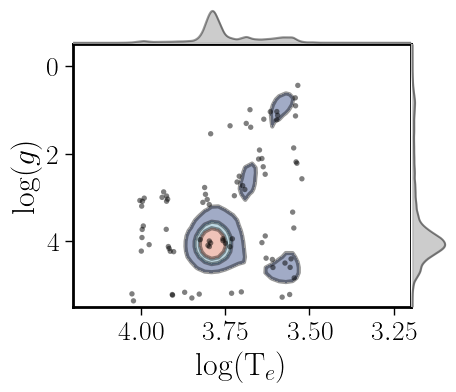

In [52]:
tab_few=tab_mean
mask = tab['FNORM']>0
mask_few = tab_few['FNORM']>0

fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],
#           c=tab_few['MET'][mask_few],edgecolor='None',s=15,alpha=0.5)
ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],color='k',
           edgecolor='None',s=15,alpha=0.5)
print(len(tab_few['TEFF'][mask_few]))
print(len(tab_mean[mask_few]))
plt.show()

85


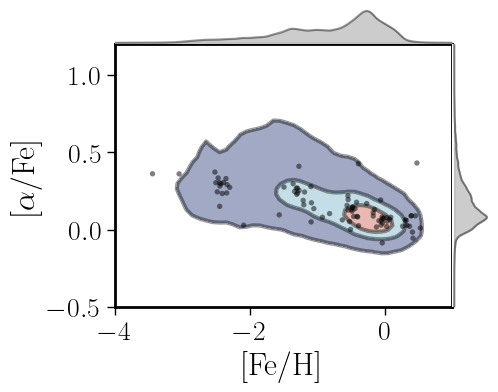

In [53]:
mask = tab['FNORM']>0
mask_few = tab_few['FNORM']>0
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.99,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],
#           c=tab_few['TEFF'][mask_few],edgecolor='None',s=15,alpha=0.5)
ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],
           color='k',edgecolor='None',s=15,alpha=0.5)

#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='r',s=15,edgecolor='None',alpha=0.5)
print(len(tab_mean[mask_few]))
